In [1]:
#import the depdancies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#load the car Details csv
data=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
#check the null values
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [4]:
#Check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
#check the columns
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
data.tail(12)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4328,Mahindra Verito 1.5 D6 BSIII,2012,200000,112198,Diesel,Individual,Manual,Second Owner
4329,Tata Manza Aura Safire BS IV,2010,160000,60000,Petrol,Individual,Manual,Second Owner
4330,Tata Indica Vista Aqua 1.4 TDI,2010,150000,130000,Diesel,Individual,Manual,Second Owner
4331,Ford EcoSport 1.5 TDCi Titanium BSIV,2015,530000,175000,Diesel,Individual,Manual,Third Owner
4332,Mahindra Scorpio S2 7 Seater,2015,750000,120000,Diesel,Individual,Manual,First Owner
4333,Maruti Ritz VDi,2012,225000,90000,Diesel,Individual,Manual,Second Owner
4334,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2012,600000,170000,Diesel,Individual,Manual,First Owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner


In [10]:
#check the categoriacal values in the data
print(data.name.value_counts())
print(data.transmission.value_counts())
print(data.fuel.value_counts())
print(data.seller_type.value_counts())
print(data.owner.value_counts())

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int6

In [133]:
#Econcode the Categorical VAlues
# encoding "Seller_Type" Column
data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "Transmission" Column
data.replace({'fuel':{'Petrol':0,'Diesel':1,'Electric':2,'LPG':3,'CNG':4}},inplace=True)


data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':3,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


In [134]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,2007,60000,70000,0,0,0,0
1,1,2007,135000,50000,0,0,0,0
2,2,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [135]:
#Spillit the data for training and testing
X=data.drop(['name','owner'],axis=1)
Y=data['owner']

In [136]:
#Split the traing and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [137]:
load=LinearRegression()

In [138]:
#fir the model
load.fit(X_train,Y_train)

LinearRegression()

In [139]:
# prediction on Training data
training_data_prediction = load.predict(X_train)

In [140]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.19269665140483427


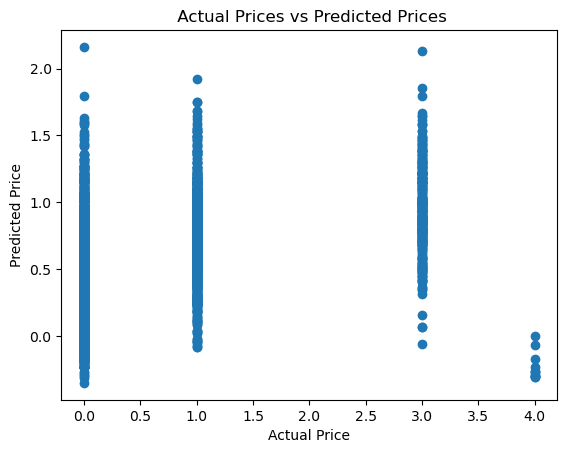

In [141]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [142]:
# prediction on Training data
test_data_prediction = load.predict(X_test)

In [143]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.18848935472593997


In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()